# <center> PCA and clustering

  
In this lesson, we will work with unsupervised learning methods such as Principal Component Analysis (PCA) and k-means clustering.

# <center>Samsung Human Activity Recognition

In this task, we will work with the [Samsung Human Activity Recognition] (https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) dataset. The data comes from the accelerometers and gyros of Samsung Galaxy S3 mobile phones ( you can find more info about the features using on the link above), the type of activity of a person with a phone in his pocket is also known - whether he walked, stood, lay, sat or walked up or down the stairs.

We imagine that the type of activity is unknown to us, and we will try to cluster people purely on the basis of available features. 

In [ ]:
# Mounting google drive to read data
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [ ]:
import os
import numpy as np

filepath = "/content/gdrive/My Drive/CS_5525_DA/Project 2/Project2/Experiment2"
X_train = np.loadtxt(os.path.join(filepath, "samsung/", "samsung_train.txt"))
y_train = np.loadtxt(os.path.join(filepath, "samsung/",
                                  "samsung_train_labels.txt")).astype(int)

X_test = np.loadtxt(os.path.join(filepath, "samsung/", "samsung_test.txt"))
y_test = np.loadtxt(os.path.join(filepath, "samsung/",
                                  "samsung_test_labels.txt")).astype(int)

In [ ]:
X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])
n_classes = np.unique(y).size
print (f"Number of classes are {n_classes}")

Number of classes are 6


[These labels correspond to:](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names)
- 1 - walking
- 2 - going up the stairs
- 3 - going down the stairs
- 4 - sitting
- 5 - standing
- 6 - lying down

[](http://)Scale the sample using `StandardScaler` with default parameters.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(10299, 561)

There are 10299 instances with 561 features. We next reduce the number of dimensions using PCA, leaving only as many components as necessary to explain at least 90% of the variance of the original (scaled) data. 

(10299, 65)

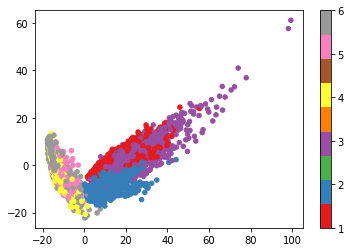

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=0.9, random_state=10).fit(X_scaled)
X_pca = pca.transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, cmap='Set1');
plt.colorbar()
X_pca.shape

The above plot shows the visualization of the 6 classes using just the first two principal component features. After applying PCA, we are left with only 65 features that can explain at least 90% of variance in the original data. We will run Kmeans on this data with k = 6 (the number of clusters we expect to see in the data).


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, n_init=100, 
                random_state=10)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

Visualize the data in the projection on the first two main components. Color the dots according to the clusters received.



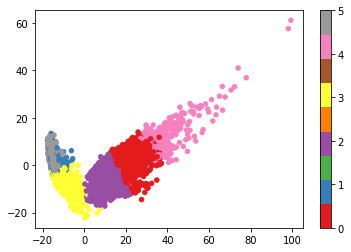

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=20,cmap='Set1');
plt.colorbar()

Look at the correspondence between the cluster labels and the original class labels and what kinds of class labels the KMeans algorithm has high confusion.



In [ ]:
import pandas as pd

tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'lying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['all']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,all
walking,741,0,903,0,78,0,1722
going up the stairs,296,0,1241,2,5,0,1544
going down the stairs,890,0,320,0,196,0,1406
sitting,0,1235,1,450,0,91,1777
standing,0,1344,0,562,0,0,1906
lying,0,52,5,329,0,1558,1944
all,1927,2631,2470,1343,279,1649,10299


In [ ]:
p_cluster1 = max(tab['cluster1'].values[:-1])/max(tab['cluster1'])
p_cluster2 = max(tab['cluster2'].values[:-1])/max(tab['cluster2'])
p_cluster3 = max(tab['cluster3'].values[:-1])/max(tab['cluster3'])
p_cluster4 = max(tab['cluster4'].values[:-1])/max(tab['cluster4'])
p_cluster5 = max(tab['cluster5'].values[:-1])/max(tab['cluster5'])
p_cluster6 = max(tab['cluster6'].values[:-1])/max(tab['cluster6'])
print(f"Purity of Cluster 1 is {p_cluster1}")
print(f"Purity of Cluster 2 is {p_cluster2}")
print(f"Purity of Cluster 3 is {p_cluster3}")
print(f"Purity of Cluster 4 is {p_cluster4}")
print(f"Purity of Cluster 5 is {p_cluster5}")
print(f"Purity of Cluster 6 is {p_cluster6}")

Purity of Cluster 1 is 0.4618578100674624
Purity of Cluster 2 is 0.5108323831242874
Purity of Cluster 3 is 0.5024291497975708
Purity of Cluster 4 is 0.4184661206254654
Purity of Cluster 5 is 0.7025089605734767
Purity of Cluster 6 is 0.944815039417829


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, n_init=100, 
                random_state=10)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

In [ ]:
import pandas as pd

tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'lying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(10)] + ['all']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,all
walking,0,11,141,0,918,378,0,195,0,79,1722
going up the stairs,0,0,63,0,153,1018,0,17,0,293,1544
going down the stairs,0,79,644,0,318,196,0,152,0,17,1406
sitting,88,0,0,70,0,1,1043,0,575,0,1777
standing,32,0,0,0,0,0,953,0,921,0,1906
lying,158,0,0,1592,0,2,47,0,145,0,1944
all,278,90,848,1662,1389,1595,2043,364,1641,389,10299


In [ ]:
p_cluster1 = max(tab['cluster1'].values[:-1])/max(tab['cluster1'])
p_cluster2 = max(tab['cluster2'].values[:-1])/max(tab['cluster2'])
p_cluster3 = max(tab['cluster3'].values[:-1])/max(tab['cluster3'])
p_cluster4 = max(tab['cluster4'].values[:-1])/max(tab['cluster4'])
p_cluster5 = max(tab['cluster5'].values[:-1])/max(tab['cluster5'])
p_cluster6 = max(tab['cluster6'].values[:-1])/max(tab['cluster6'])
p_cluster7 = max(tab['cluster7'].values[:-1])/max(tab['cluster7'])
p_cluster8 = max(tab['cluster8'].values[:-1])/max(tab['cluster8'])
p_cluster9 = max(tab['cluster9'].values[:-1])/max(tab['cluster9'])
p_cluster10 = max(tab['cluster10'].values[:-1])/max(tab['cluster10'])
print(f"Purity of Cluster 1 is {p_cluster1}")
print(f"Purity of Cluster 2 is {p_cluster2}")
print(f"Purity of Cluster 3 is {p_cluster3}")
print(f"Purity of Cluster 4 is {p_cluster4}")
print(f"Purity of Cluster 5 is {p_cluster5}")
print(f"Purity of Cluster 6 is {p_cluster6}")
print(f"Purity of Cluster 7 is {p_cluster7}")
print(f"Purity of Cluster 8 is {p_cluster8}")
print(f"Purity of Cluster 9 is {p_cluster9}")
print(f"Purity of Cluster 10 is {p_cluster10}")

Purity of Cluster 1 is 0.5683453237410072
Purity of Cluster 2 is 0.8777777777777778
Purity of Cluster 3 is 0.7594339622641509
Purity of Cluster 4 is 0.9578820697954272
Purity of Cluster 5 is 0.6609071274298056
Purity of Cluster 6 is 0.6382445141065831
Purity of Cluster 7 is 0.5105237395986295
Purity of Cluster 8 is 0.5357142857142857
Purity of Cluster 9 is 0.5612431444241316
Purity of Cluster 10 is 0.7532133676092545


This notebook is adaption from the following kaggle notebook https://www.kaggle.com/kashnitsky/topic-7-unsupervised-learning-pca-and-clustering and https://www.kaggle.com/kashnitsky/a7-demo-unsupervised-learning-solution